# Fourier Transforms

In [1]:
# numpy is the main Python array library
import numpy as np # "as np" allows us to use the abbreviation np for convenience

# we use matplotlib for plotting graphs
import matplotlib.pyplot as plt 

%matplotlib inline

## First, let's generate the time-series data 
(e.g. voltage vs. time from an oscilloscope)

Our example signal will be the sum of two sine waves, with different amplitudes and whose frequencies differ by a factor of two.

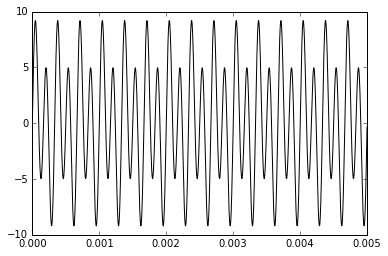

In [11]:
Fs    = 1e6    # [Hz] sampling rate
Ts    = 1/Fs   # [s]  sampling interval (time interval between samples)
tmin  = 0      # [s]  start time
tmax  = 5e-3   # [s]  end time
tt = np.arange(tmin, tmax, Ts)  # [s] time samples

ff    = 3e3          # [Hz]  Signal frequency
omega = ff*(2*np.pi) # [rad/s] Signal angular frequency
yy = 3.0*np.sin(omega*tt) + 7.0*np.sin(2*omega*tt)
plt.plot(tt, yy, 'k-')

# Doing the Fourier Transform
We then compute the fourier transform, as well as the corresponding frequencies.
We expect two peaks, one for each input frequency, and the amplitudes of the peaks should correspond to the amplitudes of the original input sine waves.

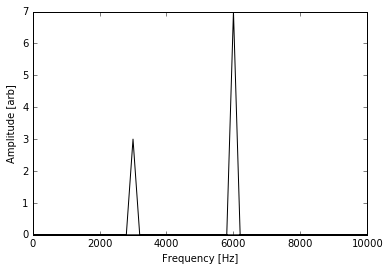

In [16]:
sp   = np.fft.fft(yy)             # compute the FFT
sp   = np.abs(sp)/(0.5*len(tt))   # compute the magnitude of the (complex) FFT (the abs value) and normalize
freq = np.fft.fftfreq(len(tt),Ts) # compute the corresponding frequencies [Hz]

plt.plot(freq, np.abs(sp), 'k-')
plt.xlim(xmin=0, xmax=10000)      # only look at the "positive frequencies"
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [arb]')